# Assignment 3

Create function that can return the amount of native english speakers and non native english speakers

In [1]:
import numpy as np
import myfunctions as mf

filename = './befkbhalderstatkode.csv'
stats = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

eng, non_eng = mf.get_eng_speaker_amount(stats, 2015)

print(eng)
print(non_eng)

5132
575163


Create a function that can take two arguments (2D array, mask), and return a filtered dataset

In [2]:
mask = (stats[:,0] == 1999) & (stats[:,3] == 5120)
f_dataset = mf.filter_dataset(stats, mask)
print(f_dataset)

[[1999    1    0 5120    1]
 [1999    1    1 5120    5]
 [1999    1    2 5120    6]
 ...
 [1999   99   53 5120    2]
 [1999   99   56 5120    1]
 [1999   99   57 5120    1]]


Create a function that can take two arguments, and return the accumulated population

In [3]:
people_acc, years = mf.get_accumulated_population(stats, 'year')
print(people_acc)
print(years)

[464566, 466129, 467253, 471300, 476751, 483658, 487969, 491082, 495699, 499148, 500531, 501285, 501664, 502362, 501158, 503699, 509861, 518574, 528208, 539542, 549050, 559440, 570172, 580295]
[1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


Illustration 1

<IPython.core.display.Javascript object>


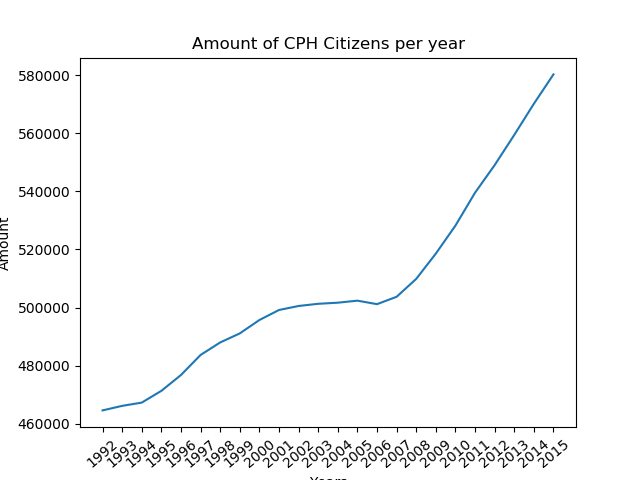

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
plt.title('Amount of CPH Citizens per year', fontsize=12)
plt.xlabel("Years", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.plot(years, people_acc)
plt.xticks(years, rotation=40)
plt.show()

Illustration 2

[957, 1042, 1105, 1144, 1217, 1304, 1365, 1491, 1607, 1616, 1695, 1662, 1740, 1860, 1944, 2157, 2480, 2848, 3114, 3342, 3416, 3632, 3880, 4021]
[1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


<IPython.core.display.Javascript object>


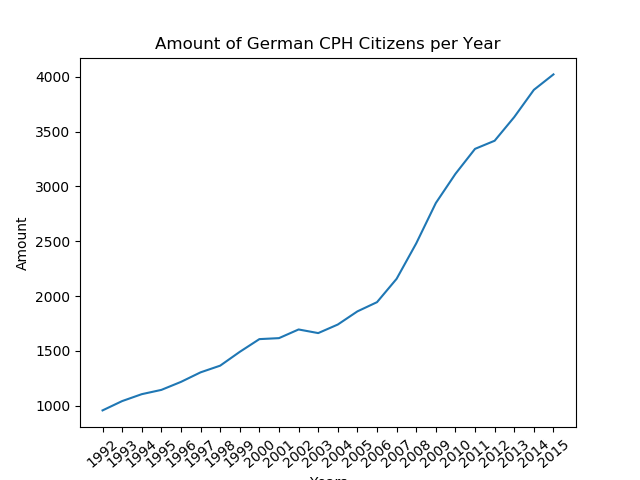

In [5]:
ger_mask = (stats[:,3] == 5180)
filtered_dataset = mf.filter_dataset(stats, ger_mask)
ger_people_acc, years = mf.get_accumulated_population(filtered_dataset, 'year')
print(ger_people_acc)
print(years)

plt.figure()
plt.title('Amount of German CPH Citizens per Year', fontsize=12)
plt.xlabel("Years", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.plot(years, ger_people_acc)
plt.xticks(years, rotation=40)
plt.show()

Illustration 3

[151252, 228714, 329292, 205973, 143221, 106393, 95572, 176583, 194988, 177034, 16050]
[82790, 101147, 72612, 61083, 70850, 59239, 68370, 68058, 68149, 75530, 1652]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 99]


<IPython.core.display.Javascript object>


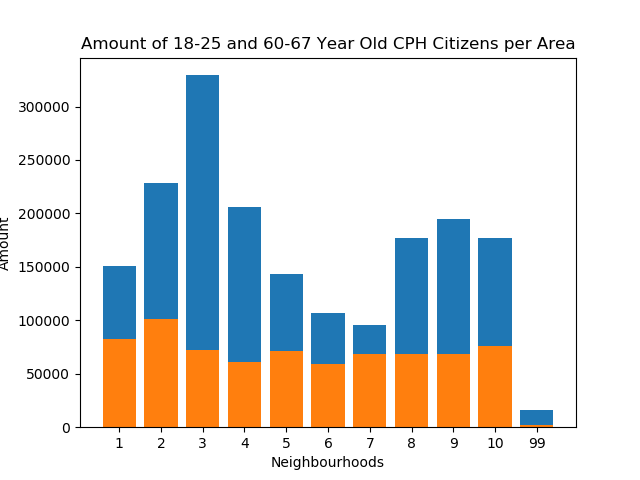

In [6]:
mask_18_to_25 = ((stats[:,2] >= 18) & (stats[:,2] <= 25))
mask_60_to_67 = ((stats[:,2] >= 60) & (stats[:,2] <= 67))

f_dataset1 = mf.filter_dataset(stats, mask_18_to_25)
f_dataset2 = mf.filter_dataset(stats, mask_60_to_67)
people_18_to_25, neighb = mf.get_accumulated_population(f_dataset1, 'neighbourhood')
people_60_to_67, neighb = mf.get_accumulated_population(f_dataset2, 'neighbourhood')

print(people_18_to_25)
print(people_60_to_67)
print(neighb)

# Changing the neighbourhoods to strings
neighb_str = []
for n in neighb:
    neighb_str.append(str(n))

plt.figure()
plt.title('Amount of 18-25 and 60-67 Year Old CPH Citizens per Area', fontsize=12)
plt.xlabel("Neighbourhoods", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.bar(neighb_str, people_18_to_25, width=0.8,  align='center')
plt.bar(neighb_str, people_60_to_67, width=0.8,  align='center')
plt.xticks(neighb_str)
plt.show()

Illustration 4

<IPython.core.display.Javascript object>


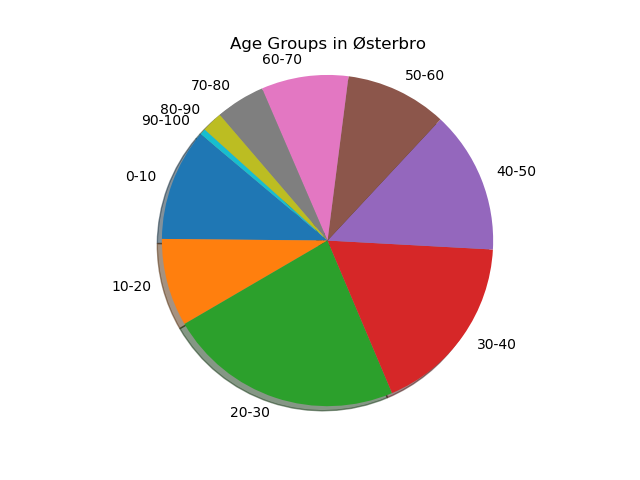

<IPython.core.display.Javascript object>


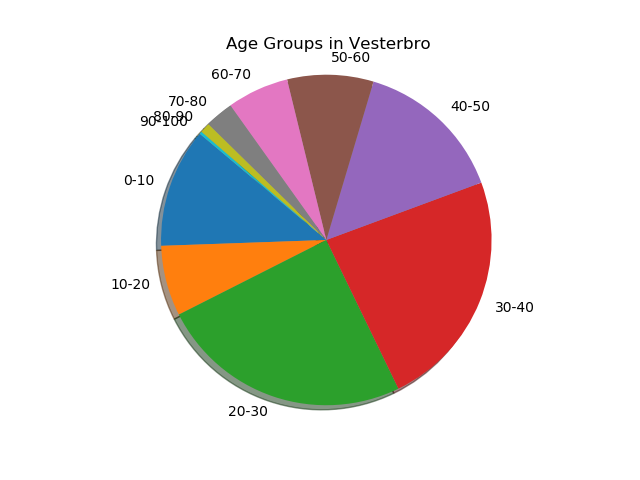

In [7]:
oesterbro_mask = (stats[:,0] == 2015) & (stats[:,1] == 2)
vesterbro_mask = (stats[:,0] == 2015) & (stats[:,1] == 4)

oest_dataset = mf.filter_dataset(stats, oesterbro_mask)
vest_dataset = mf.filter_dataset(stats, vesterbro_mask)

oesterbro_age_groups = mf.get_age_groups(oest_dataset)
vesterbro_age_groups = mf.get_age_groups(vest_dataset)

fig1, ax1 = plt.subplots()
ax1.pie(oesterbro_age_groups.values(), labels=oesterbro_age_groups.keys(), shadow=True, startangle=140) 
ax1.axis('equal')
ax1.set_title("Age Groups in Østerbro")
plt.show()

fig2, ax2 = plt.subplots()
ax2.pie(vesterbro_age_groups.values(), labels=vesterbro_age_groups.keys(), shadow=True, startangle=140) 
ax2.axis('equal')
ax2.set_title("Age Groups in Vesterbro")
plt.show()